In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('keifiat.xlsx')
data.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [34]:
data['user_id'].value_counts()

user_id
764992     265
1152044    182
4964994    154
2870189     97
535912      94
          ... 
8100544      1
534347       1
8094569      1
8000842      1
1066034      1
Name: count, Length: 56692, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_id           100000 non-null  int64 
 1   product_title        100000 non-null  object
 2   title_en             100000 non-null  object
 3   user_id              100000 non-null  int64 
 4   likes                100000 non-null  int64 
 5   dislikes             100000 non-null  int64 
 6   verification_status  100000 non-null  object
 7   recommend            100000 non-null  object
 8   title                96730 non-null   object
 9   comment              99883 non-null   object
 10  advantages           42241 non-null   object
 11  disadvantages        34121 non-null   object
dtypes: int64(4), object(8)
memory usage: 9.2+ MB


In [4]:
data.describe()

,product_id,user_id,likes,dislikes
count,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,426482.510140,4.642959e+06,3.114790,1.649460
std,232470.511159,2.619034e+06,8.050031,8.912705
min,300.000000,4.661320e+05,0.000000,0.000000
25%,220871.250000,2.613059e+06,0.000000,0.000000
50%,427858.000000,4.710290e+06,1.000000,0.000000
75%,619397.250000,7.094806e+06,4.000000,1.000000
max,909423.000000,8.623288e+06,854.000000,1344.000000


In [5]:
data['verification_status'].value_counts()

verification_status
verified        98496
rejected         1263
not_verified      241
Name: count, dtype: int64

In [6]:
data['title_en'].value_counts()

title_en
AC    16376
PC    12443
HW    10483
FA    10465
TC     9846
TS     7915
IT     6999
MA     6395
PA     5751
HA     4207
AV     3865
MO     2254
DF     1348
HC     1063
BC      524
FF       60
GF        4
GC        2
Name: count, dtype: int64

In [8]:
data.columns

Index(['product_id', 'product_title', 'title_en', 'user_id', 'likes',
       'dislikes', 'verification_status', 'recommend', 'title', 'comment',
       'advantages', 'disadvantages'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_id           100000 non-null  int64 
 1   product_title        100000 non-null  object
 2   title_en             100000 non-null  object
 3   user_id              100000 non-null  int64 
 4   likes                100000 non-null  int64 
 5   dislikes             100000 non-null  int64 
 6   verification_status  100000 non-null  object
 7   recommend            100000 non-null  object
 8   title                96730 non-null   object
 9   comment              99883 non-null   object
 10  advantages           42241 non-null   object
 11  disadvantages        34121 non-null   object
dtypes: int64(4), object(8)
memory usage: 9.2+ MB


In [11]:
data_new=data.copy()

In [15]:
data_new.drop(['product_title', 'title_en','verification_status', 'recommend', 'title', 'comment','advantages', 'disadvantages'],axis=1,inplace=True)

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   product_id  100000 non-null  int64
 1   user_id     100000 non-null  int64
 2   likes       100000 non-null  int64
 3   dislikes    100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


array([[<Axes: xlabel='product_id', ylabel='product_id'>,
        <Axes: xlabel='user_id', ylabel='product_id'>,
        <Axes: xlabel='likes', ylabel='product_id'>,
        <Axes: xlabel='dislikes', ylabel='product_id'>],
       [<Axes: xlabel='product_id', ylabel='user_id'>,
        <Axes: xlabel='user_id', ylabel='user_id'>,
        <Axes: xlabel='likes', ylabel='user_id'>,
        <Axes: xlabel='dislikes', ylabel='user_id'>],
       [<Axes: xlabel='product_id', ylabel='likes'>,
        <Axes: xlabel='user_id', ylabel='likes'>,
        <Axes: xlabel='likes', ylabel='likes'>,
        <Axes: xlabel='dislikes', ylabel='likes'>],
       [<Axes: xlabel='product_id', ylabel='dislikes'>,
        <Axes: xlabel='user_id', ylabel='dislikes'>,
        <Axes: xlabel='likes', ylabel='dislikes'>,
        <Axes: xlabel='dislikes', ylabel='dislikes'>]], dtype=object)

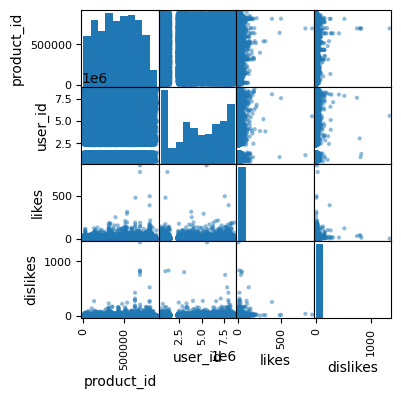

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new,figsize=(4,4))

<Axes: >

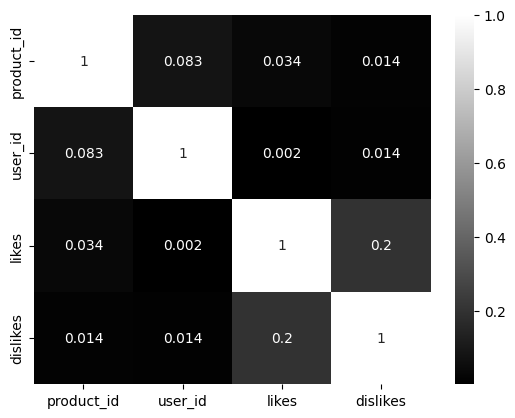

In [20]:
Correlations=data_new.corr()
sns.heatmap(Correlations,annot=True,cmap='gray')

array([[<Axes: xlabel='product_id', ylabel='product_id'>,
        <Axes: xlabel='likes', ylabel='product_id'>,
        <Axes: xlabel='dislikes', ylabel='product_id'>],
       [<Axes: xlabel='product_id', ylabel='likes'>,
        <Axes: xlabel='likes', ylabel='likes'>,
        <Axes: xlabel='dislikes', ylabel='likes'>],
       [<Axes: xlabel='product_id', ylabel='dislikes'>,
        <Axes: xlabel='likes', ylabel='dislikes'>,
        <Axes: xlabel='dislikes', ylabel='dislikes'>]], dtype=object)

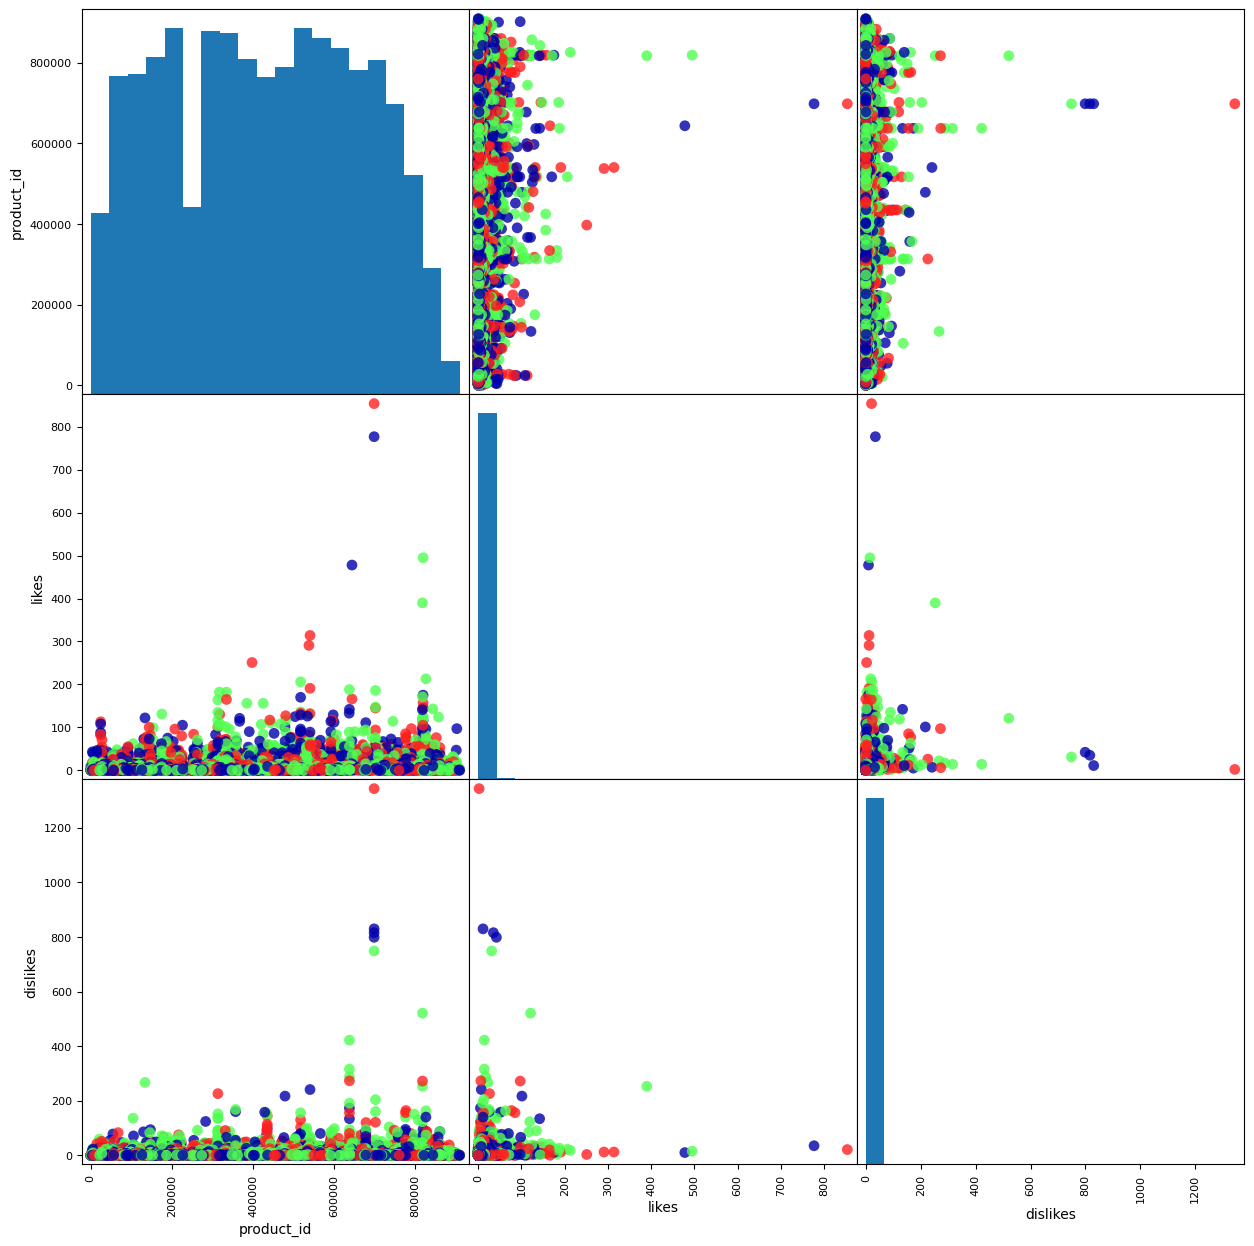

In [21]:
import mglearn
pd.plotting.scatter_matrix(data_new.drop(['user_id'],axis=1),c=data_new['user_id'], figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)

(array([9.774e+04, 1.631e+03, 3.720e+02, 1.030e+02, 5.100e+01, 3.000e+01,
        2.300e+01, 1.900e+01, 7.000e+00, 7.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,  17.08,  34.16,  51.24,  68.32,  85.4 , 102.48, 119.56,
        136.64, 153.72, 170.8 , 187.88, 204.96, 222.04, 239.12, 256.2 ,
        273.28, 290.36, 307.44, 324.52, 341.6 , 358.68, 375.76, 392.84,
        409.92, 427.  , 444.08, 461.16, 478.24, 495.32, 512.4 , 529.48,
        546.56, 563.64, 580.72, 597.8 , 614.88, 631.96, 649.04, 666.12,
        683.2 , 

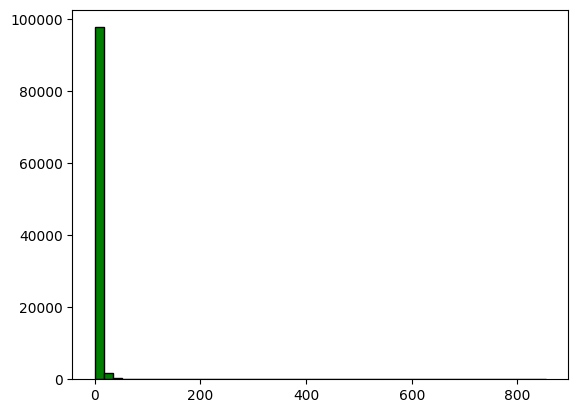

In [24]:
plt.hist(data_new['likes'],bins=50,color='green',edgecolor='black')

(array([9.9429e+04, 4.0900e+02, 8.1000e+01, 3.5000e+01, 8.0000e+00,
        1.6000e+01, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,   26.88,   53.76,   80.64,  107.52,  134.4 ,  161.28,
         188.16,  215.04,  241.92,  268.8 ,  295.68,  322.56,  349.44,
         376.32,  403.2 ,  430.08,  456.96,  483.84,  510.72,  537.6 ,
         564.48,  591.36,  618.24,  645.12,  672.  ,  698.88,  725.76,
         752.64,  779.52,  806.4 ,

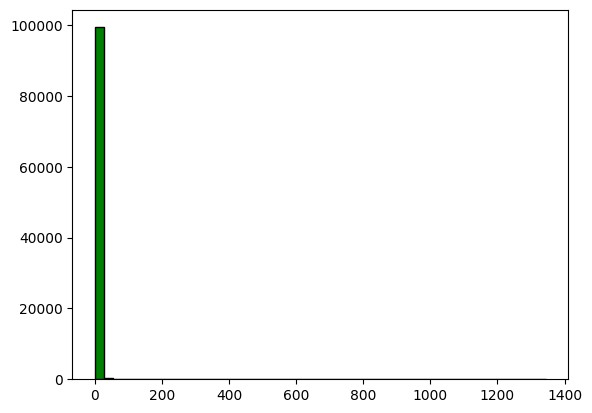

In [26]:
plt.hist(data_new['dislikes'],bins=50,color='green',edgecolor='black')

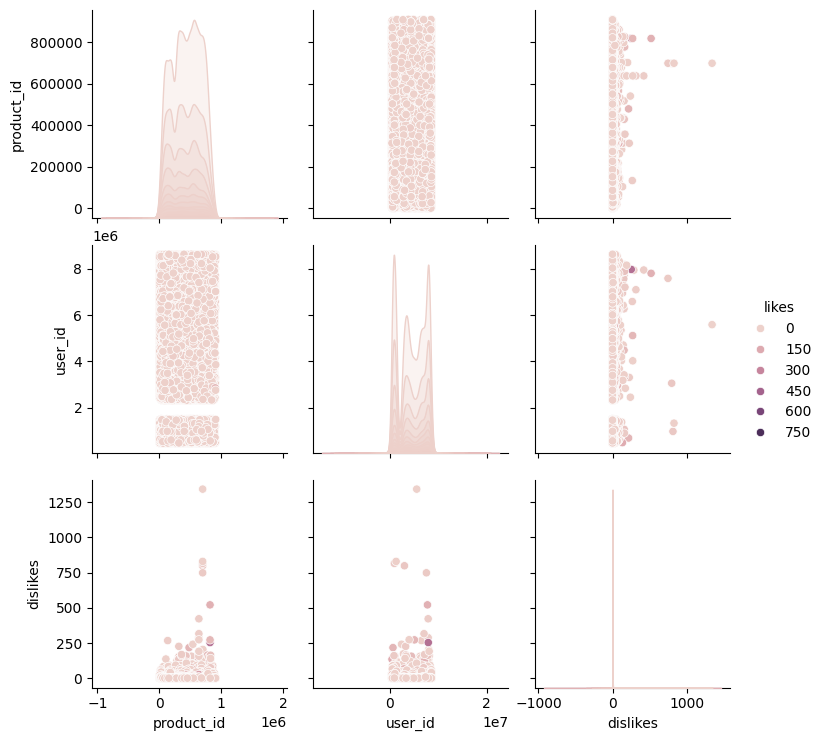

In [29]:
sns.pairplot(data_new,hue='likes')

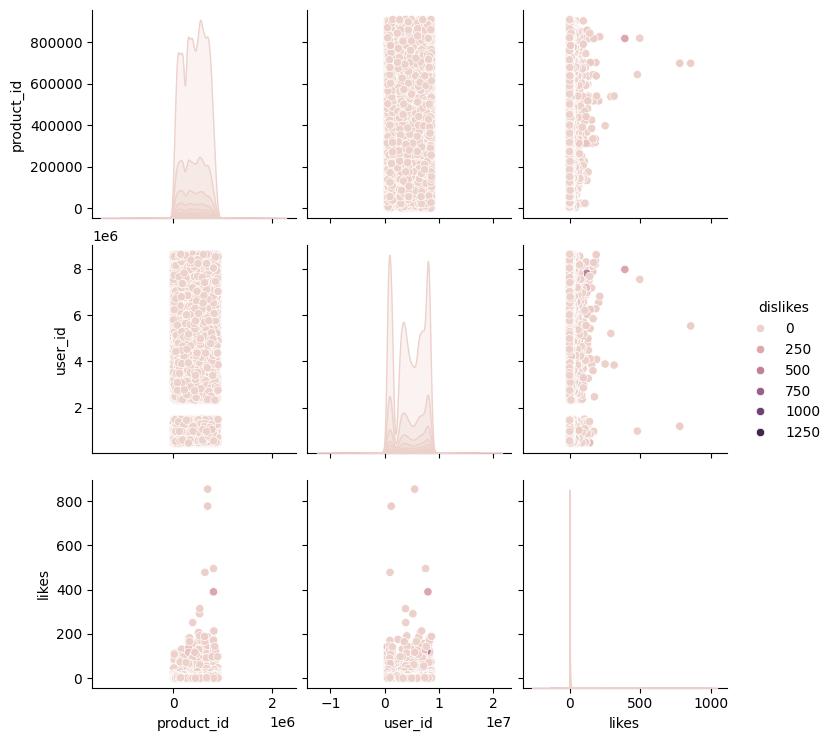

In [30]:
sns.pairplot(data_new,hue='dislikes')

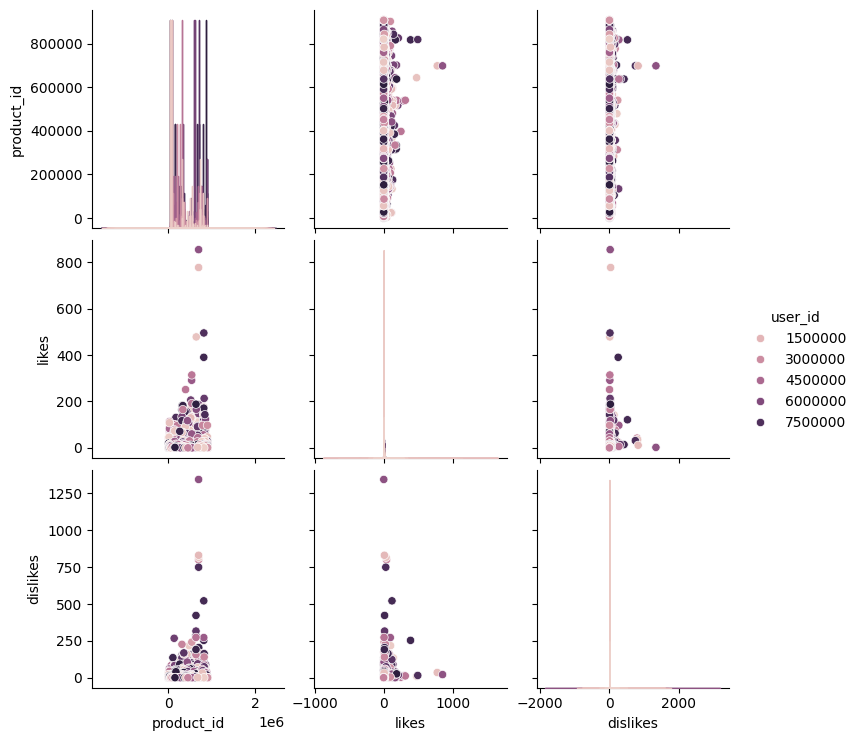

In [31]:
sns.pairplot(data_new,hue='user_id')

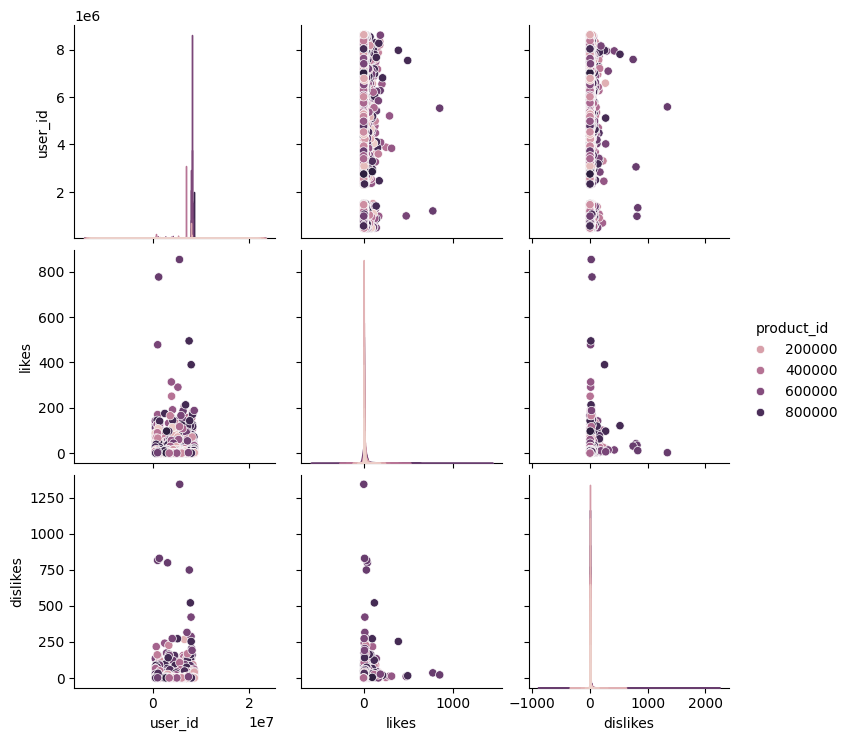

In [33]:
sns.pairplot(data_new,hue='product_id')

In [32]:
# product_id
# user_id 

(array([5077., 4399., 3006., 3150., 3212., 3016.,  999.,    0.,    0.,
           0.,    0.,  789., 1217., 1147., 2422., 1976., 2065., 2336.,
        2195., 2208., 2221., 1857., 1766., 1818., 1586., 1523., 1438.,
        1570., 1322., 1421., 1346., 1517., 1437., 1486., 1830., 2175.,
        2071., 2024., 1864., 2081., 2167., 2298., 1460., 1696., 3398.,
        4540., 4144., 3603., 1655., 1472.]),
 array([ 466132.  ,  629275.12,  792418.24,  955561.36, 1118704.48,
        1281847.6 , 1444990.72, 1608133.84, 1771276.96, 1934420.08,
        2097563.2 , 2260706.32, 2423849.44, 2586992.56, 2750135.68,
        2913278.8 , 3076421.92, 3239565.04, 3402708.16, 3565851.28,
        3728994.4 , 3892137.52, 4055280.64, 4218423.76, 4381566.88,
        4544710.  , 4707853.12, 4870996.24, 5034139.36, 5197282.48,
        5360425.6 , 5523568.72, 5686711.84, 5849854.96, 6012998.08,
        6176141.2 , 6339284.32, 6502427.44, 6665570.56, 6828713.68,
        6991856.8 , 7154999.92, 7318143.04, 7481286.16, 

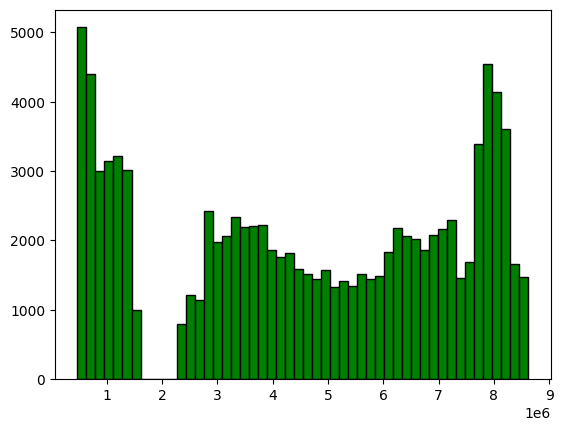

In [35]:
plt.hist(data_new['user_id'],bins=50,color='green',edgecolor='black')